## Библиотека (Py)Tesseract

Tesseract - это механизм оптического распознавания символов, который можно использовать в различных операционных системах.
Сначало необходимо установить эту библиотеку с помощью установщика https://github.com/UB-Mannheim/tesseract/wiki
Затем с помощью команды:
pip install pytesseract

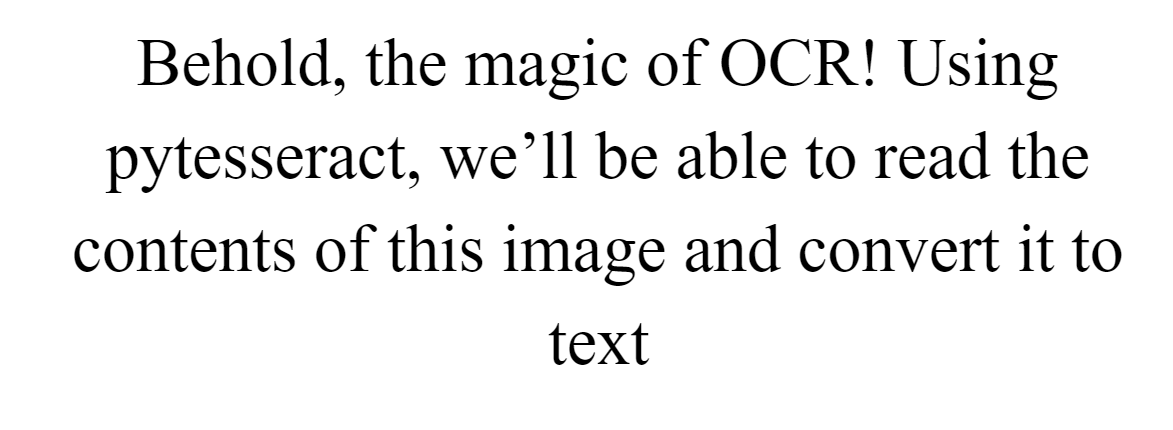

In [1]:
# Мы будем экспериментировать с tesseract, используя простое изображение красивого чистого текста.
# Давайте сначала импортируем изображение из PIL и отобразим изображение text.png.
from PIL import Image

image = Image.open("text.png")
display(image)

In [2]:
# Отлично, у нас есть базовое изображение текста
# Давайте импортируем pytesseract и используем функцию dir(), чтобы понять, что там может быть интересным

import pytesseract
dir(pytesseract)

['ALTONotSupported',
 'Output',
 'TSVNotSupported',
 'TesseractError',
 'TesseractNotFoundError',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'get_tesseract_version',
 'image_to_alto_xml',
 'image_to_boxes',
 'image_to_data',
 'image_to_osd',
 'image_to_pdf_or_hocr',
 'image_to_string',
 'pytesseract',
 'run_and_get_output']

In [9]:
# Похоже, есть несколько интересных функций, и я думаю, что функция image_to_string
#, вероятно, наш лучший выбор. Давайте воспользуемся функцией help(), чтобы немного узнать о ней 
help(pytesseract.image_to_string)

Help on function image_to_string in module pytesseract.pytesseract:

image_to_string(image, lang=None, config='', nice=0, output_type='string', timeout=0)
    Returns the result of a Tesseract OCR run on the provided image to string



In [10]:
# Эта функция принимает изображение в качестве первого параметра, затем есть несколько дополнительных параметров,
# и она вернет результаты OCR. Думаю, стоит сравнить эту строку документации
# с документацией, которую мы получали для модуля Pillow. 

help(Image.Image.resize)

Help on function resize in module PIL.Image:

resize(self, size, resample=3, box=None, reducing_gap=None)
    Returns a resized copy of this image.
    
    :param size: The requested size in pixels, as a 2-tuple:
       (width, height).
    :param resample: An optional resampling filter.  This can be
       one of :py:data:`PIL.Image.NEAREST`, :py:data:`PIL.Image.BOX`,
       :py:data:`PIL.Image.BILINEAR`, :py:data:`PIL.Image.HAMMING`,
       :py:data:`PIL.Image.BICUBIC` or :py:data:`PIL.Image.LANCZOS`.
       Default filter is :py:data:`PIL.Image.BICUBIC`.
       If the image has mode "1" or "P", it is
       always set to :py:data:`PIL.Image.NEAREST`.
       See: :ref:`concept-filters`.
    :param box: An optional 4-tuple of floats providing
       the source image region to be scaled.
       The values must be within (0, 0, width, height) rectangle.
       If omitted or None, the entire source is used.
    :param reducing_gap: Apply optimization by resizing the image
       in two 

In [11]:
# Обратите внимание на то, что функция Pillow содержит немного больше информации. 
# Здесь расширенная документация сообщает нам, что размер должен передаваться как кортеж ширины и высоты.
# Обратите внимание, как в документации для image_to_string, указано, что есть параметр "lang", который мы можем
# использовать, но затем ничего не сказано о том, для чего этот параметр или каков его формат.
#
# На самом деле это означает, что нам нужно копать глубже. Вот быстрый совет - вы можете посмотреть на
# исходный код функции - для этого вы можете использовать команду inspect getsource() и распечатать результаты
import inspect
src = inspect.getsource(pytesseract.image_to_string)
print(src)

def image_to_string(
    image, lang=None, config='', nice=0, output_type=Output.STRING, timeout=0,
):
    """
    Returns the result of a Tesseract OCR run on the provided image to string
    """
    args = [image, 'txt', lang, config, nice, timeout]

    return {
        Output.BYTES: lambda: run_and_get_output(*(args + [True])),
        Output.DICT: lambda: {'text': run_and_get_output(*args)},
        Output.STRING: lambda: run_and_get_output(*args),
    }[output_type]()



In [3]:
# На самом деле в jupyter есть еще один способ - добавить * два * вопросительных знака в конец
# функции или модуля. 

pytesseract.image_to_string??

In [ ]:
# Из исходного кода видно, что информации о параметрах немного.
# Это потому, что библиотека pytesseract вызывает C ++
# библиотеку, которая выполняет всю тяжелую работу.
# Это частая проблема при работе с библиотеками Python, и это означает
# нам нужно провести веб-поиск, чтобы понять, как мы можем взаимодействовать с tesseract.
#
# В таком случае я просто погуглил "параметры командной строки tesseract", и первое попадание было
# URL: https://github.com/tesseract-ocr/tessdoc/blob/master/Command-Line-Usage.md
#
# Это ведет на вики-страницу, которая описывает, как вызвать исполняемый файл тессеракта, и, читая, мы видим
# что мы можем заставить tesseract использовать несколько языков, таких как английский и хинди,
# передавая их как "eng + hin". Очень круто.

In [13]:
# И последнее, что стоит упомянуть - функция image_to_string() принимает "изображение", но документация не
# описывает, что это за изображение. Это строка к файлу изображения?
# Или что-то другое?
#
# Опять же, нам нужно экспериментировать, чтобы понять, что мы должны делать. Если мы посмотрим на исходный
# код библиотеки pytesseract, мы увидим, что там есть функция run_and_get_output(). Вот
# ссылка на эту функцию на github:
# https://github.com/madmaze/pytesseract/blob/d1596f7f59a517ad814b7d810ccdef7d33763221/src/pytesseract.py#L199
#
# В этой функции мы видим, что первое, что происходит - изображение сохраняется 
# функцией save_image(). Вот эта строка кода:
# https://github.com/madmaze/pytesseract/blob/d1596f7f59a517ad814b7d810ccdef7d33763221/src/pytesseract.py#L116
#
# И мы видим, что вызывается другая функция, prepare(image), которая фактически загружает изображение как
# файл изображения Pillow. 
# Хорошо, давайте попробуем запустить tesseract для изображения
# Но перед этим нужно указать путь к программе tesseract.exe. Укажите СВОЙ путь:
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'
text = pytesseract.image_to_string(image)
print(text)

Behold, the magic of OCR! Using
pytesseract, we’ll be able to read the
contents of this image and convert it to
text



In [ ]:
# Выглядит отлично! Мы видим, что вывод точно представляет текст
# но не содержит специального форматирования.

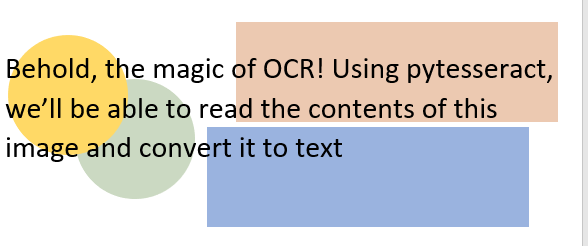

In [14]:
# В предыдущем примере мы использовали четкое, однозначное изображение для преобразования. Однако есть и
# шумы в изображениях, которые нужно распознать, что затрудняет извлечение текста. К счастью, есть
# методы, которые мы можем использовать для повышения эффективности распознавания текста с помощью pytesseract и Pillow.
#
# Давайте на этот раз воспользуемся другим изображением, с тем же текстом, что и раньше, но с добавлением шума на картинке.
# Мы можем посмотреть на это изображение, используя следующий код.
from PIL import Image
img = Image.open("ocr.png")
display(img)

In [15]:
# Как видите, это изображение имеет разную непрозрачность за текстом, что может сбивать с толку
# движок тессеракта. Посмотрим, будет ли работать OCR на этом шумном изображении
import pytesseract
text = pytesseract.image_to_string(Image.open("ocr.png"))
print(text)

e magic of OCR! Using pytesseract,
le to read the contents of this

 

d convert it to text



In [ ]:
# Это немного удивительно, учитывая, как хорошо раньше работал tesseract! Поэкспериментируем с изображением
# используя техники, которые позволят более эффективно анализировать изображения. Прежде всего, давайте изменим размер
# изображения

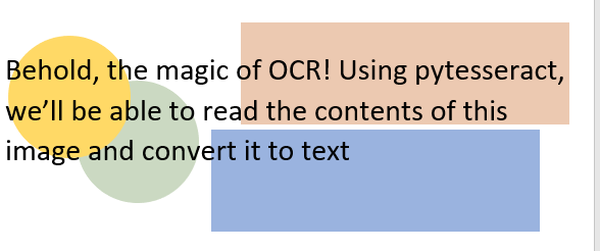

e magic of OCR! Using pytesseract,
le to read the contents of this
d convert it to text

  



In [16]:
# Сначала мы импортируем PIL
import PIL 
# Затем установим базовую ширину нашего изображения
basewidth = 600 
# Теперь давайте откроем его
img = Image.open("ocr.png")
# Мы хотим получить правильное соотношение сторон, поэтому мы можем сделать это, взяв базовую ширину и разделив
# на фактическую ширину изображения
wpercent = (basewidth / float(img.size[0]))
# При таком соотношении мы можем получить подходящую высоту изображения.
hsize = int((float(img.size[1]) * float(wpercent)))
# Наконец, давайте изменим размер изображения. Сглаживание - это особый способ изменения размера линий, чтобы попытаться сделать их
# ее гладкой
img = img.resize((basewidth, hsize), PIL.Image.ANTIALIAS)
# Теперь давайте сохраним это в файл
img.save('resized_nois.png')
# И наконец, давайте отобразим его
display(img)
# и запустите OCR
text = pytesseract.image_to_string(Image.open('resized_nois.png')) 
print(text)

In [17]:
# Хм, никаких улучшений при изменении размера изображения. Давайте преобразуем изображение в оттенки серого. 
# Преобразование изображений можно сделать разными способами. Если мы посмотрим на документацию Pillow, мы обнаружим, 
# что самый простой способ сделать это - использовать функцию convert() передав строку 'L'
img = Image.open('ocr.png')
img = img.convert('L')
# Теперь давайте сохраним это изображение
img.save('greyscale_noise.jpg')
# И запустите OCR на изображении в оттенках серого
text = pytesseract.image_to_string(Image.open('greyscale_noise.jpg')) 
print(text)

Behold, the magic of OCR! Using pytesseract,
we'll be able to read the contents of this
image and convert it to text



In [ ]:
# Ух ты, это действительно хорошо сработало! Если мы посмотрим на справочную документацию с помощью функции 
# help(img.convert) мы видим, что здесь механизм преобразования - это преобразование яркости ITU-R 601-2.
# Этот метод, по сути, использует трехканальное изображение,
# где есть информация о количестве красного, зеленого и синего (R, G и B), и уменьшает его
# в один канал для представления яркости. 

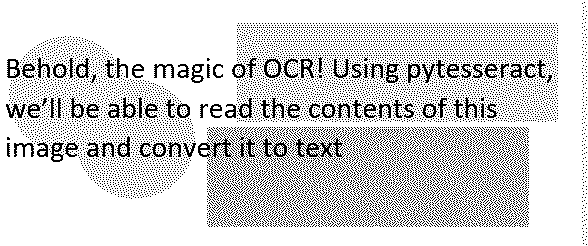

In [18]:
# Несмотря на то, что теперь у нас есть полный текст изображения, есть несколько других методов
# которые мы могли бы использовать, чтобы помочь улучшить обнаружение OCR в случае, если вышеупомянутые методы не помогают.
# Следующий подход, который я бы использовал, называется бинаризацией, что означает разделение на две
# отдельные части - в данном случае черное и белое. Бинаризация осуществляется через процесс
# который называется пороговым значением. Если значение пикселя больше порогового значения, оно будет преобразовано
# в черный пиксель; если он ниже порога, он будет преобразован в белый пиксель.
# Этот процесс устраняет шум в процессе оптического распознавания символов, обеспечивая более высокую точность распознавания изображений.
# С Pillow это очень просто.
# Давайте откроем зашумленное изображение и преобразуем его с помощью бинаризации
img = Image.open('ocr.png').convert('1')
# Теперь давайте сохраним и отобразим это изображение
img.save('black_white_noise.jpg')
display(img)

Trying with threshold 0


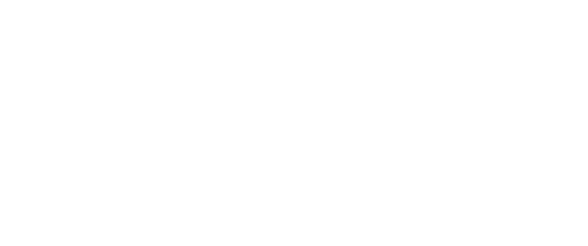


Trying with threshold 64


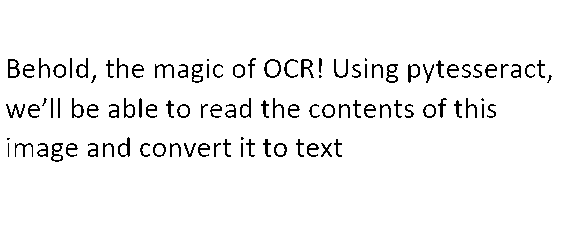

Behold, the magic of OCR! Using pytesseract,
we’ll be able to read the contents of this
image and convert it to text

Trying with threshold 128


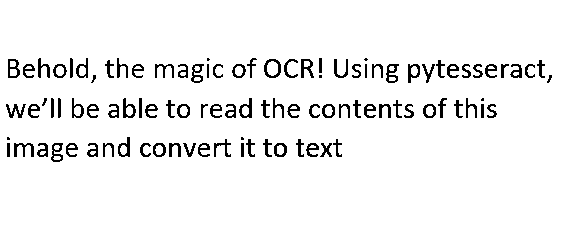

Behold, the magic of OCR! Using pytesseract,
we'll be able to read the contents of this
image and convert it to text

Trying with threshold 192


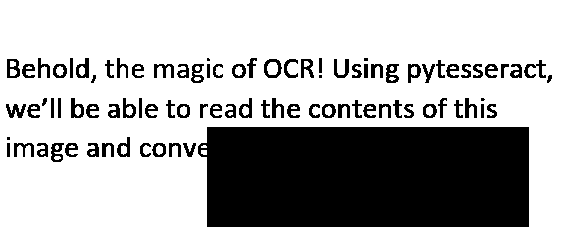

Behold, the magic of OCR! Using pytesseract,
we’ll be able to read the contents of this
image and conv

 
 

Trying with threshold 256


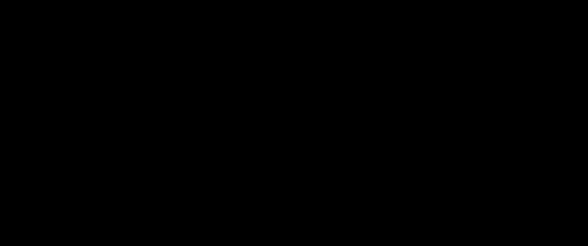

In [19]:
# Итак, это было немного волшебно, и действительно требовало чтения документации, чтобы понять
# что число "1" является строковым параметром функции преобразования, фактически выполняющей бинаризацию.
# Но на самом деле у вас есть все навыки, необходимые для написания этой функции самостоятельно.
# Давайте рассмотрим пример. Во-первых, давайте определим функцию под названием binarize, которая принимает
# изображение и пороговое значение:
def binarize(image_to_transform, threshold):
    # теперь давайте конвертируем это изображение в одно изображение в оттенках серого с помощью convert()
    output_image=image_to_transform.convert("L")
    # пороговое значение обычно предоставляется как число от 0 до 255
    # - количество бит в байте.
    # алгоритм бинаризации довольно прост, перебираем каждый пиксель в
    # изображении и, если он больше порогового значения, переводим его полностью вверх (255) и
    # если он ниже порога, переводим его до упора (0).
    # так что давайте напишем это в коде. Во-первых, нам нужно перебрать все пиксели в
    # изображении, с которым мы хотим работать
    for x in range(output_image.width):
        for y in range(output_image.height):
            # для данного пикселя в точке w, h, давайте проверим его значение на соответствие порогу
            if output_image.getpixel((x,y))< threshold: #note that the first parameter is actually a tuple object
                # установим это значение в ноль
                output_image.putpixel( (x,y), 0 )
            else:
                # в противном случае установим 255
                output_image.putpixel( (x,y), 255 )
    # теперь мы просто возвращаем новое изображение
    return output_image

# давайте протестируем эту функцию в диапазоне различных пороговых значений. Помните, что вы можете использовать
# функцию range() для создания списка чисел с разным размером шага. range() вызывается
# с началом, остановкой и размером шага. Итак, давайте попробуем range(0, 257, 64), которая должна сгенерировать 5
# изображений с разными пороговыми значениями
for thresh in range(0,257,64):
    print("Trying with threshold " + str(thresh))
    # Отобразим бинаризованное изображение встроенным
    display(binarize(Image.open('ocr.png'), thresh))
    # И давайте применим на нем tesseract. Бинаризовать его дважды неэффективно, но это только для
    # демо
    print(pytesseract.image_to_string(binarize(Image.open('ocr.png'), thresh)))

In [ ]:
# Из результатов видно, что порог 0, по сути, превращает все в белое,
# что текст становится более жирным по мере того, как мы приближаемся к более высокому порогу, и что
# фигуры, закрашенные серым цветом, становятся более заметными при увеличении
# порога. Позже мы подробнее рассмотрим некоторые проблемы
# которые вы можете ожидать при применении OCR на реальных данных

## Tesseract и фотографии

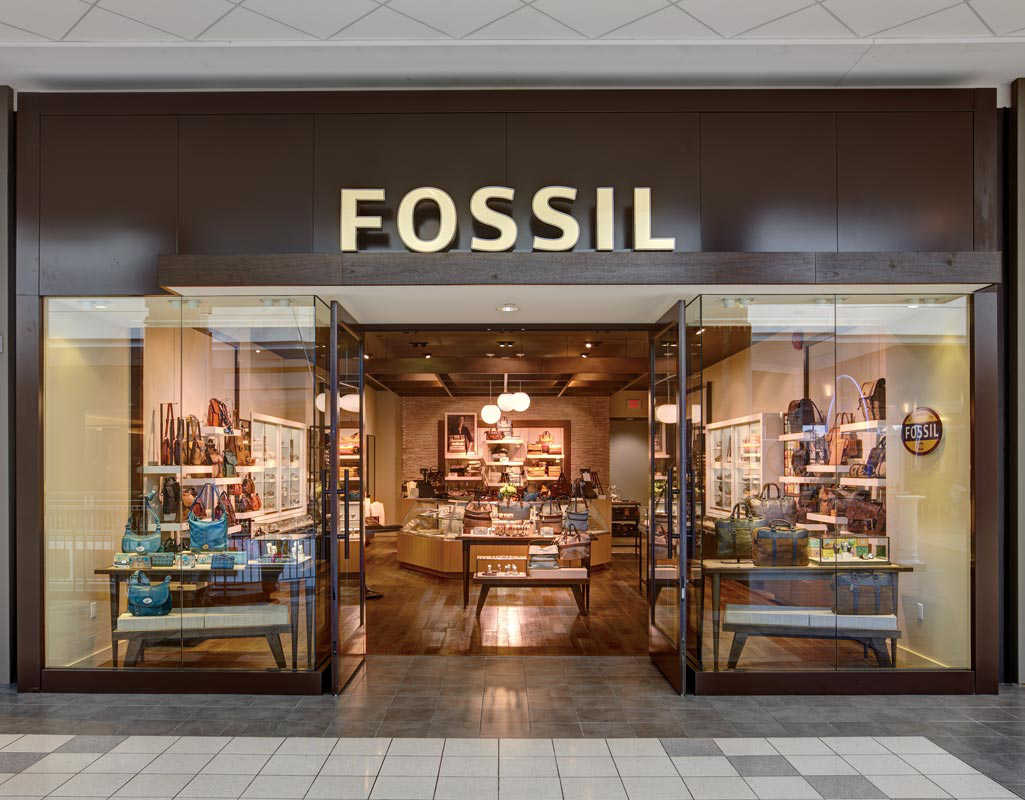

' \n\x0c'

In [20]:
# Давайте попробуем новый пример.
# Здесь изображение витрины, давайте загрузим его и попробуем получить название
# магазина на изображении
from PIL import Image
import pytesseract
# Давайте прочитаем изображение витрины и отобразим его
image=Image.open('storefront.png')
display(image)
# Наконец, давайте попробуем запустить tesseract на этом изображении и посмотрим, каковы результаты
pytesseract.image_to_string(image)

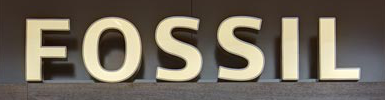

'FOSSIL\n\x0c'

In [21]:
# Мы видим в самом низу пустую строку. Тессеракт не может взять
# это изображение и вытащить название. Но мы научились обрезать изображения
# так что давайте попробуем помочь Tesseract, вырезая определенные фрагменты.
#
# Во-первых, установим ограничивающую рамку. На этом изображении название магазина будет заключено в рамку
# (315, 170, 700, 270)
bounding_box=(315, 170, 700, 270)

# Теперь давайте обрежем изображение
title_image=image.crop(bounding_box)

# Теперь давайте отобразим его и вытащим текст
display(title_image)
pytesseract.image_to_string(title_image)

In [22]:
# Отлично, мы видим, как мы можем заставить это работать. Итак, теперь нам
# удалось взять изображение, предварительно обработать его там, где мы ожидаем увидеть текст, и вытащить этот текст
# в строку, понятную Python.
#
# Если вы посмотрите на изображение, вы увидите небольшой постер внутри
# магазина, на котором также есть название магазина. Интересно, сможем ли мы распознать текст на
# этом постере? Давайте попробуем.
#
# Сначала нам нужно определить ограничивающую рамку для этого постера. 
bounding_box=(900, 420, 940, 445)

# Теперь давайте обрежем изображение
little_sign=image.crop((900, 420, 940, 445))
display(little_sign)

In [23]:
# Хорошо, это небольшой знак! OCR лучше работает с изображениями с более высоким разрешением, поэтому
# увеличим размер этого изображения с помощью функции подушки resize()
# Давайте установим ширину и высоту в десять раз больше, чем сейчас в кортеже (w, h)
new_size=(little_sign.width*10,little_sign.height*10)

# Теперь давайте проверим документацию для resize()
help(little_sign.resize)

Help on method resize in module PIL.Image:

resize(size, resample=3, box=None, reducing_gap=None) method of PIL.Image.Image instance
    Returns a resized copy of this image.
    
    :param size: The requested size in pixels, as a 2-tuple:
       (width, height).
    :param resample: An optional resampling filter.  This can be
       one of :py:data:`PIL.Image.NEAREST`, :py:data:`PIL.Image.BOX`,
       :py:data:`PIL.Image.BILINEAR`, :py:data:`PIL.Image.HAMMING`,
       :py:data:`PIL.Image.BICUBIC` or :py:data:`PIL.Image.LANCZOS`.
       Default filter is :py:data:`PIL.Image.BICUBIC`.
       If the image has mode "1" or "P", it is
       always set to :py:data:`PIL.Image.NEAREST`.
       See: :ref:`concept-filters`.
    :param box: An optional 4-tuple of floats providing
       the source image region to be scaled.
       The values must be within (0, 0, width, height) rectangle.
       If omitted or None, the entire source is used.
    :param reducing_gap: Apply optimization by resizi

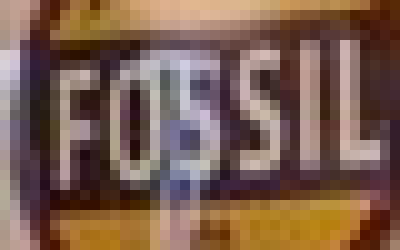

In [24]:
# Мы видим, что существует ряд различных фильтров для изменения размера изображения. 
# И по умолчанию Image.NEAREST. Посмотрим, как это выглядит
display(little_sign.resize( new_size, Image.NEAREST))

0


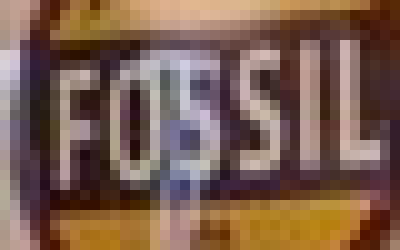

4


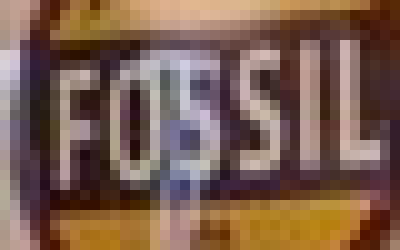

2


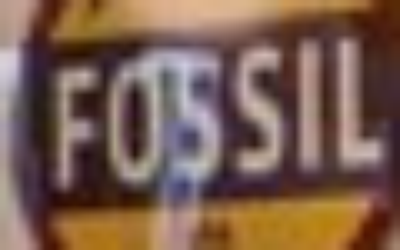

5


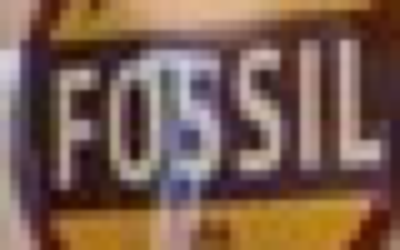

3


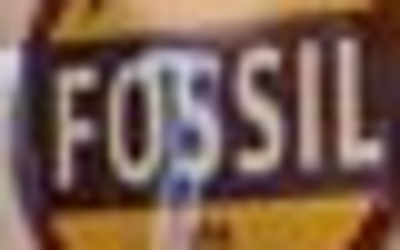

1


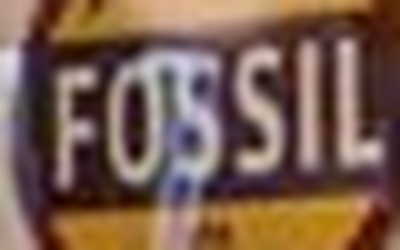

In [25]:
# Я думаю, мы сможем найти что-нибудь получше. 
# Давайте посмотрим, как выглядят различные варианты изменения размера
options=[Image.NEAREST, Image.BOX, Image.BILINEAR, Image.HAMMING, Image.BICUBIC, Image.LANCZOS]
for option in options:
   # выводим название опции
    print(option)
    # покажем, как эта опция выглядит на нашей маленькой табличке
    display(little_sign.resize( new_size, option))

In [26]:
# Здесь мы можем заметить две вещи. Во-первых, когда мы распечатываем одно значение из выборки
# на самом деле это просто целое число! Это действительно обычное дело:
# Разработчик API записывает свойство, например Image.BICUBIC, а затем назначает ему
# целочисленное значение для передачи. Некоторые языки используют перечисления значений,
# например, в Java, но в Python это довольно нормальный способ работы.
# Второе, что мы узнали, это то, что существует ряд различных алгоритмов для
# передискретизация изображения. В этом случае хорошо подходят фильтры Image.LANCZOS и Image.BICUBIC.
# Давайте посмотрим, сможем ли мы распознать текст на этом изображении с измененным размером.

# Сначала изменим размер до большего размера
bigger_sign=little_sign.resize(new_size, Image.BICUBIC)
# Распечатываем текст
pytesseract.image_to_string(bigger_sign)

'\x0c'

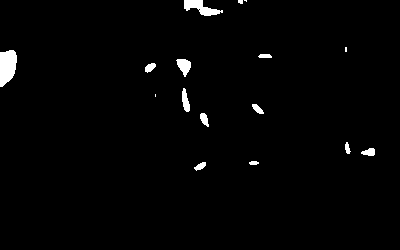

'Va\n\x0c'

In [27]:
# Ну нет там текста. Давайте попробуем преобразовать это в двоичную форму. 

def binarize(image_to_transform, threshold):
    output_image=image_to_transform.convert("L")
    for x in range(output_image.width):
        for y in range(output_image.height):
            if output_image.getpixel((x,y))< threshold:
                output_image.putpixel( (x,y), 0 )
            else:
                output_image.putpixel( (x,y), 255 )
    return output_image

# Теперь давайте применим бинаризацию, скажем, с порогом 190, и попробуем отобразить это

binarized_bigger_sign=binarize(bigger_sign, 190)
display(binarized_bigger_sign)
pytesseract.image_to_string(binarized_bigger_sign)

In [ ]:
list=open ("readonly/words_alpha.txt", "r")
print(list)

In [28]:
# Хорошо, этот текст бесполезен. Как выбрать лучшую бинаризацию?
# Что ж, есть несколько методов, но давайте попробуем что-нибудь очень простое.
# чтобы показать, насколько хорошо это может работать. У нас есть английское слово, которое мы пытаемся обнаружить.
# Если бы мы попробовали все бинаризации, от 0 до 255, и посмотрели, есть ли
# любые английские слова в этом списке.
# Сначала загрузим список английских слов из списка.

eng_dict=[]
with open ("words.txt", "r") as f:
    data=f.read()
    # теперь мы хотим разбить это на список на основе символов новой строки
    eng_dict=data.split("\n")

# Теперь давайте переберем все возможные пороги и найдем английское слово, напечатав его
# если оно существует
for i in range(150,170):
    # давайте преобразуем в двоичную форму и преобразуем это в строчные значения
    strng=pytesseract.image_to_string(binarize(bigger_sign,i))
    # Мы хотим удалить не алфавитные символы, например ([% $]) из текста, вот
    # короткий способ сделать это
    # сначала конвертируем нашу строку только в нижний регистр
    strng=strng.lower()
    # затем импортируем строковый пакет - у него хороший список строчных букв
    import string
    # теперь давайте переберем нашу строку, посимвольно просматривая ее, и помещая ее в
    # сравнительный текст
    comparison=''
    for character in strng:
        if character in string.ascii_lowercase:
            comparison=comparison+character
    # наконец, будем искать для сравнения в файле словаря
    if comparison in eng_dict:
        # и распечатываем, если найдем
        print(comparison)

gas
fossil
fossil
fossil
gas
gas
as
sl


In [ ]:
# Ну, не идеально, но мы видим искомое слово среди других значений, которые есть в словаре.
# Это неплохой способ очистить данные OCR. Может быть полезно использовать
# словарь на практике, особенно если вы создаете поисковую систему для специализированного языка
# например, базы медицинских знаний или местоположения. 
# Здесь вы узнали, как манипулировать изображениями и преобразовывать их в текст. 
# Позже мы углубимся в библиотеку компьютерного зрения
# которая позволяет нам обнаруживать лица среди прочего.

## Виджеты Jupyter 

In [4]:
# Здесь мы познакомимся с одной из наиболее продвинутых функций
# среды разработки ноутбуков Jupyter, называемая виджетами. Иногда мы хотим
# взаимодействовать с созданной функцией и вызывать ее несколько раз с разными
# параметрами. Например, если бы мы хотели нарисовать красную рамку вокруг части
# изображение, чтобы попытаться точно настроить место обрезки. Виджеты - один из способов сделать это быстро
# в браузере без необходимости учиться писать большое настольное приложение.
#
# Давайте проверим. Сначала мы импортируем классы Image и ImageDraw из

from PIL import Image, ImageDraw

# Затем мы импортируем класс взаимодействия из пакета виджетов
from ipywidgets import interact

# Мы будем использовать interact для аннотирования функции. Давайте откроем изображение,
# например, изображение витрины
image=Image.open('storefront.png')

# Хорошо, наша настройка завершена. Теперь мы используем декоратор взаимодействия, чтобы указать
# что мы хотим обернуть функцию python. Мы делаем это с помощью знака @. Это будет
# набор параметров, идентичных вызываемой функции. Тогда Jupyter
# нарисует несколько ползунков на экране, чтобы мы могли манипулировать этими значениями. Декораторы,
# это то, что описывается знаком @, и это стандартные операторы Python и просто
# сокращение для функций, которые обертывают другие функции.

@interact(left=100, top=100, right=200, bottom=200)

# Теперь мы просто пишем функцию, которая была у нас раньше
def draw_border(left, top, right, bottom):
    img=image.copy()
    drawing_object=ImageDraw.Draw(img)
    drawing_object.rectangle((left,top,right,bottom), fill = None, outline ='red')
    display(img)

interactive(children=(IntSlider(value=100, description='left', max=300, min=-100), IntSlider(value=100, descri…

In [ ]:
# Если вы хотите
# узнать больше, вы можете прочитать об этом здесь:
# https://ipywidgets.readthedocs.io/en/stable/examples/Using%20Interact.html